In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('seaborn-v0_8')

from google.colab import drive
drive.mount('/content/drive')
cwd = os.getcwd()
print(cwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')
df.shape

(1338, 7)

In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We convert categorical features into binary values and transform the region by OneHot encoding.

In [ ]:
df['sex'] = df['sex'].apply(lambda x : 0 if x == 'male'else 1)
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

df = pd.get_dummies(df)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [ ]:
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
charges,float64
region_northeast,bool
region_northwest,bool
region_southeast,bool
region_southwest,bool


We divide the values into training and test values

In [ ]:
features = df.drop('charges', axis = 1).columns
x, y = df[features], df['charges']

x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.3, random_state = 42)

print(x_train.shape)
print(x_test.shape )

(936, 9)
(402, 9)


We standardize the data. We will also add polynomial features to improve the quality of the model. We allow it to better adjust to the data. This may lead to more accurate forecasts.

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(x_train_scaled)

x_train_scaled_poly = poly.transform(x_train_scaled)
x_test_scaled_poly = poly.transform(x_test_scaled)


print(x_train_scaled_poly.shape)
print(x_test_scaled_poly.shape)

(936, 54)
(402, 54)


In [ ]:
lr_model_poly = linear_model.LinearRegression()
lr_model_poly.fit(x_train_scaled_poly, y_train)

y_train_predict_poly = lr_model_poly.predict(x_train_scaled_poly)
y_test_predict_poly = lr_model_poly.predict(x_test_scaled_poly)

print('Train R^2:  {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_poly)))
print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict_poly)))
print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict_poly)*100))
print()
print('Test R^2:  {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))

Train R^2:  0.840
Train MAE: 2956
Train MAPE: 30

Test R^2:  0.860
Test MAE: 2692
Test MAPE: 29


Used to get the names of polynomial features

In [ ]:
poly_features = poly.get_feature_names_out(features)

Creating a table of coefficients

In [ ]:
w_df = pd.DataFrame({'Features': poly_features, 'Coefficients': lr_model_poly.coef_})

intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_model_poly.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coefficients
0,age,3.686956e+03
1,sex,2.703406e+15
2,bmi,2.053006e+03
3,children,8.264458e+02
4,smoker,-3.265799e+15
5,region_northeast,2.602302e+16
6,region_northwest,-8.529550e+15
7,region_southeast,-8.584907e+15
8,region_southwest,-6.464572e+16
9,age^2,7.773126e+02


We construct a linear regression with L1-regularization (Lasso) on polynomial features. I use the default value as the alpha parameter, the max_iter parameter = 2000

In [ ]:
lasso_lr_poly = linear_model.Lasso(alpha = 1, max_iter=2000)
lasso_lr_poly.fit(x_train_scaled_poly, y_train)

y_train_predict_poly = lasso_lr_poly.predict(x_train_scaled_poly)
y_test_predict_poly = lasso_lr_poly.predict(x_test_scaled_poly)

print('Train R^2:  {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_poly)))
print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict_poly)))
print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict_poly)*100))
print()
print('Test R^2:  {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))

Train R^2:  0.840
Train MAE: 2959
Train MAPE: 30

Test R^2:  0.861
Test MAE: 2684
Test MAPE: 29


In [ ]:
print(np.round(lasso_lr_poly.coef_, 3))

[ 3.683055e+03  2.163520e+02  2.052466e+03  8.364340e+02  9.573461e+03
  2.940040e+02  2.734700e+01 -0.000000e+00 -5.043400e+01  7.950550e+02
 -1.191420e+02  1.303070e+02 -8.085000e+01  6.338000e+00 -2.831360e+02
 -1.245850e+02  6.300000e-02  1.124330e+02  0.000000e+00 -6.048400e+01
  1.908570e+02 -6.082000e+01  2.872800e+02 -1.011840e+02 -1.557960e+02
  1.450480e+02 -2.966890e+02  1.273650e+02  3.564329e+03  2.473840e+02
  1.753760e+02 -1.011900e+01 -4.195300e+01 -6.352100e+01 -2.292250e+02
  1.350040e+02  1.321070e+02 -7.300000e-02 -1.988650e+02  6.397900e+01
  3.050000e-01 -5.545900e+01 -1.357480e+02  2.517520e+02  7.909500e+01
 -6.689000e+00 -0.000000e+00  0.000000e+00  4.500000e-02 -0.000000e+00
  0.000000e+00 -0.000000e+00  1.384000e+00 -8.636600e+01]


We construct a linear regression with L2 regularization on polynomial features.

In [ ]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(x_train_scaled_poly, y_train)

y_train_predict_poly = ridge_lr_poly.predict(x_train_scaled_poly)
y_test_predict_poly = ridge_lr_poly.predict(x_test_scaled_poly)

print('Train R^2:  {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_poly)))
print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict_poly)))
print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict_poly)*100))
print()
print('Test R^2:  {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))

Train R^2:  0.840
Train MAE: 2960
Train MAPE: 30

Test R^2:  0.861
Test MAE: 2686
Test MAPE: 29


In [ ]:
print(np.round(ridge_lr_poly.coef_, 3))

[3679.159  216.471 2051.875  838.133 3154.46   108.772  -13.087  -26.635
  -71.097  796.286 -120.022  130.709  -83.24     7.379 -208.09   -51.262
   76.64   186.615   11.105  -61.711  191.955  -62.467  243.689 -145.136
 -200.285  102.895 -296.66   128.831 3561.139  154.162   83.645 -105.134
 -134.499  -64.803 -230.254  117.621  115.069  -19.345 -217.238 4530.97
  -13.312  -70.168 -149.71   239.116  120.663  -54.198  -48.905  -18.786
  -15.547   22.93    47.761  -29.039   57.069  -87.86 ]


Let's plot our linear regression model by L1-regularization (Lasso) on polynomial features

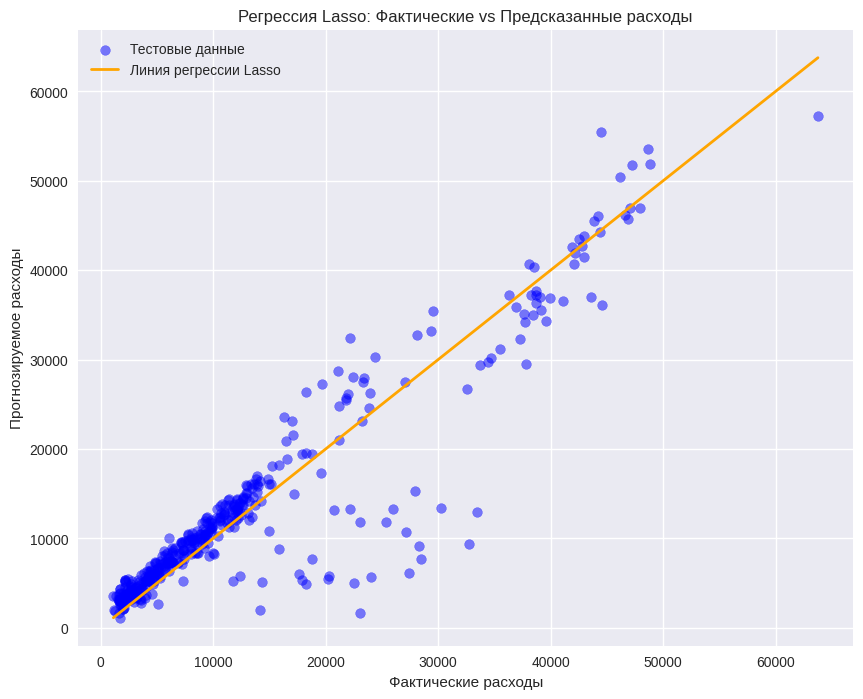

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_test_predict_poly, color='blue', label='Тестовые данные', alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', label='Линия регрессии Lasso', linewidth=2)

plt.xlabel('Фактические расходы')
plt.ylabel('Прогнозируемое расходы')
plt.title('Регрессия Lasso: Фактические vs Предсказанные расходы')
plt.legend()
plt.grid(True)
plt.show()